# Electrolysis

Electrolysis follows the reaction:

$H_2O \rightarrow H_2 + \frac{1}{2} O_2$.

$\Delta$H = $\Delta$G + T$\Delta$S

$\Delta H$(25$^\circ$C) = 285.84 kJ/mol, 
$\Delta G$(25$^\circ$C) = 237.2 kJ/mol, 
$\Delta S$(25$^\circ$C) = 0.1631 kJ/mol/K

http://www.helmeth.eu/index.php/technologies/high-temperature-electrolysis-cell-soec

https://ieeexplore.ieee.org/abstract/document/5898382

### Energy balance

In [3]:
dH = 285.84  # [kJ/mol]
dH = dH/3600/(2*1.008*1e-3)
print("Electrical energy required to produce 1kg of H2: ", dH, "kWh")

Electrical energy required to produce 1kg of H2:  39.38492063492063 kWh


### Mass balance

In [16]:
Mh = 1.008  # hydrogen atomic mass [g/mol]
mw = 1  # mass of water [kg]
Mw = 18.0153  # water molar mass [g/mol]
nomolw = mw*1e3/Mw  # Number of mols of H_2O
nomolh2 = nomolw  # Number of mols of H_2 produced
mh2 = nomolh2*2*Mh/1000  # hydrogen (H_2) mass produced
mw = 1/mh2  # mass of water required to produce 1 kg of H_2
print("Mass of water required to produce 1kg of H2: ", mw, "kg")

Mass of water required to produce 1kg of H2:  8.936160714285714 kg


### Some real numbers

Next cells present data provided by some manufacturers. We only considered manufacturers that reported global energy consumption of the hydrogen production system.

<cite data-cite="6356110/SXGTBWZC"></cite>

https://ieeexplore.ieee.org/abstract/document/5898382

1 Nm$^3$ is 1 cubic meter at Normal temperature and pressure conditions (NTP).

NTP: T = 293.15 K and P = 1 atm

1 Nm$^3$ = 0.084 kg (NIST)

In [17]:
# AccaGen: alkaline(bipolar) electrolizer, efficiency = 53 - 73%
semin = 4.87  # specific energy [kWh/Nm^3]
semax = 6.7

seave = (semin+semax)/2
seave1 = seave/0.084  # kWh/kg
print("Required electrical energy: ", seave1, "kWh/H2kg")

Required electrical energy:  68.86904761904762 kWh/H2kg


In [18]:
# H2 Logic: alkaline(bipolar) electrolizer, efficiency = 65 - 71%
semin = 5  # specific energy [kWh/Nm^3]
semax = 5.45

seave = (semin+semax)/2
seave2 = seave/0.084  # kWh/kg
print("Required electrical energy: ", seave2, "kWh/H2kg")

Required electrical energy:  62.20238095238094 kWh/H2kg


I thought maybe that those numbers were a little bit old because the report they came out of is from 2011. So, I looked for more recent numbers and the following report lists the system-level efficiency to be up to 67%.

https://www.energy.gov/sites/prod/files/2017/11/f46/HPTT%20Roadmap%20FY17%20Final_Nov%202017.pdf

This numbers are consistent with the values found here:
https://www.researchgate.net/publication/330701158_Hydrogen_Production_Technologies_Overview

E = 53.4 - 70.1 kWh/kg of H2 at 1 atm and 25C (approximately normal conditions).

In [22]:
# We assume a 67% efficienciy
see = 40/0.67  #Energy required 40kWh
print("specific energy: ", see, "kWh/kg-H2")

specific energy:  59.70149253731343 kWh/kg-H2


### Different reactor sizes

We consider a thermal-to-electrical efficiency of 33%. This number changes for different conversion cycles and reactor outlet temperatures.
We take 60 kWh as the energy cost of 1kg of H$_2$.

In [1]:
import numpy as np
import hydrogen as h2
import matplotlib.pyplot as plt

Pth = 10
print("Production rate of a ", Pth, "MWth reactor: ", h2.lte_prod_rate(Pth, 0.33)[1], "kg/h")

Production rate of a  10 MWth reactor:  55.0 kg/h


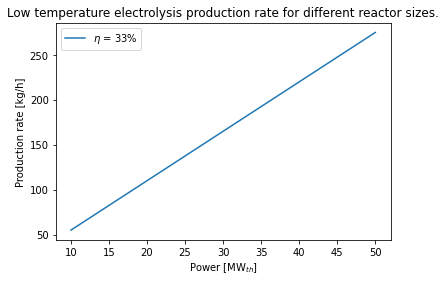

In [4]:
power = [10, 20, 30, 40, 50]  #thermal
prate = [h2.lte_prod_rate(p, 0.33)[1] for p in power]

plt.plot(power, prate, label='$\eta$ = 33%')
plt.legend(loc="upper left")
plt.title('Low temperature electrolysis production rate for different reactor sizes.')
plt.ylabel('Production rate [kg/h]')
plt.xlabel('Power [MW$_{th}$]')
plt.savefig("figures/lte-size", dpi=300, bbox_inches="tight")

### Future work

* Add analysis for different thermal-to-electrial energy efficiencies
* Study Economics